# Rozpoznawanie obrazu
Ostatnia aktualizacja: 2021.04.07

Zanim zaczniemy: Runtime / Change runtime type / włączamy GPU

## MNIST
Zaczniemy od zbioru MNIST (Modified National Institute of Standards and Technology), zawierającego 70 000 pisanych ręcznie cyfr (o wymiarach 28x28 pixeli w skali szarości o wartościach 0-255, czyli 1 bajt na pixel).
Zbiór jest już podzielony na dane treningowe i testowe, jest bardzo popularny, więc łatwo jest porównać nasze wyniki z publikownaymi w internecie.  
Do sieci neuronowych będziemy używać Keras, który jest nakładką na Tensorflow / Theano / CNTK.  
Obecnie najczęściej do przetwarzania obrazu używa się Tensorflow, Keras, PyTorch i Caffe. Ten ostatni moim zdaniem jest najmniej przyjazny i traci na popularności, ale kiedyś był często używany do obrazu, więc ma spore 'model zoo'.  
Na początek zaimportujmy nasz zbiór z keras.datasets i numpy.  
Zbiory dostępne w Keras:  
https://keras.io/datasets/


## Instructions
Powtórz eksperyment z pierwszego notatnika (w którym klasyfikowaliśmy MNIST używając SVM i CNN) na zbiorze danych CIFAR-10: https://keras.io/datasets/

Najpierw przeprowadź klasyfikację za pomocą sieci, które stworzyliśmy na zajęciach - trzeba je dostosować, bo zdjęcia w CIFAR są w RGB, czyli mają 3 kanały.

Następnie wydziel zbiór walidacyjny i dodaj early stopping (https://keras.io/api/callbacks/early_stopping/)

Kolejnym krokiem jest próba poprawienia wyniku. Spróbuj wprowadzić modyfikacje (np. dodawanie, usuwanie lub modyfikacja warstw Conv2D, Dense, Pooling, dodanie Dropoutu, modyfikacja hiperparametrów, itd.) do sieci, które mogłyby poprawić jej skuteczność. Stwórz co najmniej 3 takie sieci i opisz wprowadzone w nich zmiany.

Dla chętnych: jakby ktoś chciałby się bardziej pobawić sieciami, można spróbować dodać jeszcze data augmentation i zrobić porównanie treningu z augmentation i bez.

Wrzuć plik .ipynb ze swoimi eksperymentami i opisami stworzonych sieci.

W razie pytań lub wąpliwości, proszę pisać: lukasz.wilczynski@pjwstk.edu.pl
My work

In [2]:
from keras.datasets import cifar10 as dataset
import numpy as np

Wczytajmy dane mnist do zmiennych X_train, y_train, X_test, y_test, używając metody load_data. 
X jest dużą literą bo to macierz, y małą bo wektor.

In [3]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

### Wizualizacja danych
Zanim zaczniemy cokowliek robić z naszymi danymi, warto zobaczyć, jak wyglądają. Na dobry początek wypiszmy sobie kształty naszych zbiorów danych oraz  wydrukujmy pierwszy element zbioru treningowego (funkcja print) i jego etykietę. 

In [4]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)


Ponieważ nasze dane to tak naprawdę pixele w skali szarości, możemy je sobie wyświetlić jako obrazki. pyplot ma funkcję imshow, użyjmy jej do wyświetlenia pierwszego elementu zbioru treningowego. Ponieważ skala szarości, podajmy wartość argumentu cmap 'gray' lub 'Greys'. [Tutaj są różne color mapy.](   
https://matplotlib.org/examples/color/colormaps_reference.html)

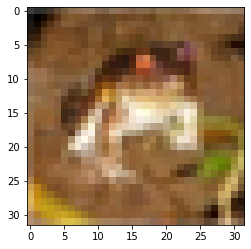

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='bone')

Kiedy drukujemy nasz element funkcją print, nie jest to do końca czytelne, ponieważ rzędy nie mieszczą się w jednej linijce. Wydrukujmy sobie lewy górny róg pierwszego obrazka, np kwadrad 16x16 pixeli (jeśli 16 się nie zmieści, to trochę mniej). Ten sam kwadrat wydrukujmy używając imshow. Czy widać, że patrzymy na to samo? 
Podsumowując, musimy dostać się do pierwszego elementu zbioru treningowego, i przekazać jego kawałek (slice) funkcjom print i imshow. Jeśli ktoś nie wie jak, zamiast przekopywać dokumentację [możemy zerknąć na SO](https://stackoverflow.com/questions/509211/understanding-slice-notation_)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  [ 68  54  42]
  [ 98  73  52]
  [119  91  63]
  [139 107  75]
  [145 110  80]
  [149 117  89]
  [149 120  93]
  [131 103  77]
  [125  99  76]
  [142 115  91]
  [144 112  86]
  [137 105  79]
  [129  97  71]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  [ 51  27   8]
  [ 88  51  21]
  [120  82  43]
  [128  89  45]
  [127  86  44]
  [126  87  50]
  [116  79  44]
  [106  70  37]
  [101  67  35]
  [105  70  36]
  [113  74  35]
  [109  70  33]
  [112  72  37]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  [ 83  50  23]
  [110  72  41]
  [129  92  54]
  [130  93  55]
  [121  82  47]
  [113  77  43]
  [112  78  44]
  [112  79  46]
  [106  75  45]
  [105  73  38]
  [128  92  48]
  [124  87  47]
  [130  92  56]]

 [[ 33  25  17]
  [ 38  20   4]
  [ 87  54  25]
  [106  63  28]
  [115  70  33]
  [117  74  35]
  [114  72  37]
  [105  62  33]
  [107  68  33]
  [121  84  45]
  [125  90  53]
  [109  75  40]
  [113  77  38]
  [146 105  58]
  

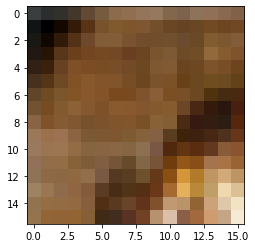

In [6]:
image_slice = X_train[0][0:16, 0:16]
print(image_slice)
plt.imshow(image_slice, cmap='gray')

Jeśli widzimy, że obrazek i print pokazują to samo, obejrzyjmy teraz więcej danych.  
Narysujmy sobie pierwsze 9 lub 16 elementów. Przydadzą się funkcje subplot, imshow z pyplot i ewentualnie google. 

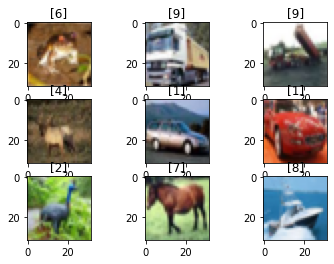

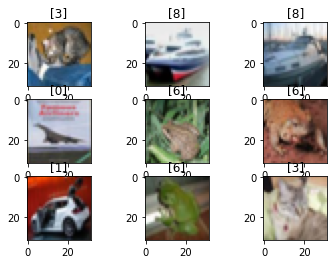

In [7]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])
plt.show()

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.title(y_test[i])
  plt.imshow(X_test[i], cmap='gray')
plt.show()

OK, czyli wiemy, jak wyglądają nasze dane. Są to pixele w skali szarości, gdzie 0 to pustka, a 255 to bardzo mocno wciśnięty długopis.  

### Klasyfikacja SVM'em
Ponieważ jest to popularny zbiór danych, możemy sobie podejrzeć, jak różne modele powinny sobie z nim poradzić.  
https://en.wikipedia.org/wiki/MNIST_database  
Z tabelki na tej stronie wynika, że najlepiej radzą sobie CNNy, ale SVM też wypada całkiem nieźle.  
Problem jest taki, że na 60 000 instancji będzie się strasznie długo uczył, więc zrobimy trening na części. Chętni mogą sobie powtórzyć na pełnym zbiorze w domu.  
Zróbmy sobie zmienną train_count i ustawmy jej wartość na 10 000 - na tylu danych będziemy ćwiczyć nasz SVM. Wydrukujmy sobie kształt naszego wycinka pierwszych 10 000 instancji treningowych. 
Zobaczmy też, jak wygląda rozkład klas - czy przypadkiem w pierwszych 10 000 instancji nie będą np. same jedynki i dwójki. Numpy ma przydatną funkcję unique. 

In [8]:
train_count = 10000
X_train = X_train[0:train_count]
y_train = y_train[0:train_count]

np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1005,  974, 1032, 1016,  999,  937, 1030, 1001, 1025,  981],
       dtype=int64))

Użyjmy SVM'a z scikit-learn'a. Deskewing sobie odpuścimy (jak ktoś bardzo chce, proponuję w domu lub na szybko znaleźć gotowy kod), tak jak w linku użyjmy 'poly' kernel, a gamma ustawmy na 0.1.
Czyli chcemy stworzyć obiekt klasyfikatora używając svm.SVC, a następnie wytrenować go na 10000 danych treningowych (metoda fit).  
SVM może przyjąć dane w postaci wektora liczb, więc przyda się metoda reshape, która pozwoli nam przekształcić 2-wymiarowe macierze w wektory.

In [9]:
X_train.shape

(10000, 32, 32, 3)

In [10]:
from sklearn import svm
classifier = svm.SVC(kernel='poly', gamma=0.1)
classifier.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train)

SVC(gamma=0.1, kernel='poly')

Jeśli wszystko się udało, teraz zobaczmy, jak mu pójdzie z danymi testowymi. Użyjmy metody 'predict' naszego wytrenowanego już klasyfikatora i zapiszmy sobie wynik do zmiennej y_pred (dostaniemy wektor 'predykcji').

In [11]:
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))

Teraz porównajmy sobie nasze predykcje z prawidłowymi etykietami. Wypiszmy sobie może pierwsze 10 wyników i 10 etykiet. 

In [12]:
print(y_pred[:20])
print(y_test[:20])

[3 8 8 8 4 6 1 4 2 1 8 1 5 7 1 8 3 7 8 6]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


Świetnie. sklearn ma sporo funkcji do analizowania wyników predykcji, użyjmy accuracy_score i confusion_matrix (powinny być w skearn.metrics). 

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.4166
[[504  84  98  42  61  37  30  64 130  80]
 [ 37 488  14  32  27  14  17  39  85 216]
 [ 86  33 355 147 191 122 140  87  39  15]
 [ 35  47  95 295  95 216 152  83  32  43]
 [ 44  27 141  70 371  87 140 107  32  26]
 [ 22  33  84 180  63 326  56  87  22  31]
 [ 18  19  95 103  85  66 402  30   9  24]
 [ 34  25  71  51  70  75  28 443  21  58]
 [173  82  30  40  27  35  15  17 576 101]
 [ 47 162  17  40  10  22  20  43  54 406]]


Patrząc na confusion matrix widzimy, co się najczęściej myli, np 1 i 7, 3 i 5, itp. Jak widzieliśmy, SVM przyjmuje wektor zamiast macierzy, czyli nasze dane przestały być 2D. Nasz obrazek teraz ma 28*28 na 1 pixeli. 

[Tutaj](https://scikit-learn.org/stable/modules/model_persistence.html) jest opisana serializacja wytrenowanych modeli w sklearn, teraz nie mamy takiej potrzeby.

### Mnist fashion i inne
Teraz zmieńmy zbiór danych z mnist na mnist_fashion i zobaczmy jak sobie 
poradzi z ubraniami. Możemy albo skopiować komórki powyżej, albo zmienić tylko import mnist na fashion_mnist w pierwszej początkowej komórce kodu i uruchomić wszystkie pozostałe jeszcze raz na nowym zbiorze danych (są kompatybilne).  

Jak komuś się bardzo spodobało rozpoznawanie cyfr, to jest jeszcze zbiór emnist:  
https://www.nist.gov/node/1298471/emnist-dataset  
https://www.kaggle.com/crawford/emnist  

Przy okazji - na kaggle są bardzo ciekawe zbiory danych: 
https://www.kaggle.com/datasets  

### Klasyfikacja CNN'em
SVM poradził sobie całkiem nieźle, zobaczmy jak poradzi sobie CNN.  
Spróbujmy zrobić i wytrenować niewielką sieć - taką, która wytrenuje się w kilka minut. 

####Przygotowanie danych

Dla porządku wczytajmy jeszcze raz dane, czyli wczytujemy je do X_train, y_train, X_test, y_test używając metody load_data.  

In [14]:

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [15]:
# shuffler = np.random.permutation(len(X_train))
# X_train = X_train[shuffler]
# y_train = y_train[shuffler]
# (X_train, X_validation) = np.split(X_train, [int(0.8*len(X_train))])
# (y_train, y_validation) = np.split(y_train, [int(0.8*len(y_train))])


Sprawdźmy kształty naszych danych (metoda shape) i sprawdźmy jakiego typu są nasze dane (funkcja type). Sprawdźmy zarówno typ zbioru treningowego jak i pojedynczego pixela. 

In [16]:
print(len(y_train))
print(len(X_train))
# print(len(y_validation))
# print(len(X_validation))

50000
50000


In [17]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][0][0]))

X_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
X_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Sieć szybciej się nauczy na danych o wartościach w zakresie 0-1 niż 0-255, więc musimy je znormalizować. Przeróbmy dane treningowe i testowe tak, żeby miały wartości w zakresie 0-1 zamiast 0-255. Następnie sprawdźmy typ pojedynczego pixela. 


In [18]:
X_train = X_train / 255 # przechodzimy z przedziału 0-255 na 0-1
X_test = X_test / 255

Domyślna konfiguracja Keras korzysta z 32-bitowych float'ów. Jak w trakcie treningu będziemy podawać sieci 64-bitowe tablice, będzie dużo niepotrzebnego kopiowania, alokowania pamięci, itp. Dlatego przed treningiem zadbajmy o to, żeby nasze dane treningowe i testowe były w formacie 32-bitowym (numpy, metoda astype). 


In [19]:
print(type(X_train[0][0][0]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(type(X_train[0][0][0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (score dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot zamiast tego będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

w keras.utils.np_utils mamy funcję to_categorical, która nam zrobi konwersję. Wyniki wpiszmy do zmiennych Y_train i Y_test (duże litery bo macierze). 

In [20]:
# [1000000000] -> score dla cyfry 0
# [0.1 0.2 0.4 ... 0.7 0.1] max 0.7; zwyciezca - cyfra 8


In [21]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
# y_validation = np_utils.to_categorical(y_validation)
Y_test = np_utils.to_categorical(y_test)

Ostatnia sprawa. Conv2D przyjmuje obrazki w postaci tablicy wielowymiarowej - nie spłaszczamy danych do postaci wektora tak jak w przypadku SVM'a, bo nasz filtr / kernel działa na danych 'przestrzennych' - szerokość x wysokość x liczba kanałów.  
W przypadku zdjęć 200 x 200 pixeli w RGB, każdy obrazek byłby tablicą o wymiarach 200 x 200 x 3 (lub 3 x 200 x 200 zależnie od tego jak przechowujemy dane).  
Tutaj mamy 1 bajt na pixel i obrazek o wymiarach przestrzennych 28 x 28. Zatem nasze dane powinny mieć wymiary 28 x 28 x 1 (czyli ostatnia wartość nie może być liczbą, tylko tablicą przechowującą liczbę).

Czyli musimy wcisnąć 1 wymiar. Gdzie go wciskamy, zależy od konfiguracji. 

```python
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], 1, X_train.shape[1], X_train.shape[2])
    input_shape = (1, X_train.shape[1], X_train.shape[2])
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
 ```
 

In [22]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0],X_train.shape[2], X_train.shape[1])
    input_shape = (1, X_train.shape[1], X_train.shape[2])
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
    X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 3)
    input_shape = (X_train.shape[1], X_train.shape[2], 3)

#### Przygotowanie sieci

We wszystkich Conv2D zrobimy kernel 3x3 i aktywację 'relu'.
We wszystkich MaxPooling2D robimy pool_size 2x2

Zróbmy sobie taki model (może być Sequential): 
- Na wejściu Conv2D (musimy podać input_shape - mamy go w zmiennej input_shape)
- MaxPooling2D
- Conv2D, 32 filtry
- MaxPooling2D
- Flatten (spłaszczamy dane do 1-wymiarowego wektora)
- [Dense (czyli tzw. fully connected)](https://keras.io/layers/core/), 128 units, activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
- Na wyjściu Dense, units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Na pewno przydadzą się te importy: 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [23]:
Y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model_basic = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

Mamy obiekt 'model', teraz musimy uruchomić metodę 'compile', która przygotuje nas do treningu. Spróbujmy loss 'categorical_crossentropy', optimizer 'adam'. Argument metric przyjmuje tablicę stringów, będziemy chcieli 'accuracy'. 

In [25]:
model_basic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trening
Podobnie jak w scikit-learn uruchamiamy metodę fit, podając jej nasze dane treningowe i etykiety w postaci one-hot.  

20 epok, batch_size np. 128 lub 256  

In [26]:
model_basic.fit(X_train, Y_train, epochs=30, batch_size=256, validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 11s 67ms/step - loss: 1.8110 - accuracy: 0.3478 - val_loss: 1.5984 - val_accuracy: 0.4351
Epoch 2/30
157/157 [==============================] - 10s 66ms/step - loss: 1.4567 - accuracy: 0.4788 - val_loss: 1.3742 - val_accuracy: 0.5179
Epoch 3/30
157/157 [==============================] - 10s 66ms/step - loss: 1.3240 - accuracy: 0.5309 - val_loss: 1.3045 - val_accuracy: 0.5437
Epoch 4/30
157/157 [==============================] - 10s 66ms/step - loss: 1.2316 - accuracy: 0.5654 - val_loss: 1.2853 - val_accuracy: 0.5471
Epoch 5/30
157/157 [==============================] - 10s 67ms/step - loss: 1.1574 - accuracy: 0.5915 - val_loss: 1.2048 - val_accuracy: 0.5783
Epoch 6/30
157/157 [==============================] - 10s 66ms/step - loss: 1.1036 - accuracy: 0.6112 - val_loss: 1.2067 - val_accuracy: 0.5759
Epoch 7/30
157/157 [==============================] - 10s 66ms/step - loss: 1.0485 - accuracy: 0.6303 - val_loss: 1.1498 - val_accuracy:

#### Ewaluacja
Zobaczmy, jak nasz model sobie radzi: model.evaluate()

In [27]:
scores = model_basic.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1155 - accuracy: 0.6712


In [28]:
print(scores[1])

0.6711999773979187


Przyjrzyjmy się konkretnym przypadkom: model.predict_classes, zapiszmy sobie do wektora y_pred

In [29]:
y_pred = model_basic.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[:20])
print(y_test[:20])

[3 1 8 0 4 6 1 2 3 1 4 9 5 7 9 6 5 7 8 6]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


Zobaczmy, na których instancjach testowych sobie nie radzi. Możemy na przykład porównać y_pred z y_test (operator !=). W wyciągnięciu indeksów pomyłkowych instancji pomoże nam funkcja numpy nonzero. Zapiszmy sobie te indeksy do zmiennej false_pred i wypiszmy jej zawartość. 

In [30]:
false_pred = np.nonzero(y_pred != y_test)[0]
print(false_pred[0:10])

[0 0 0 0 0 0 0 0 0 0]


Teraz narysujmy sobie te cyfry, np 9 pierwszych. Możemy użyć kodu z wcześniejszego ćwiczenia, tylko: 
- ponieważ przerabialiśmy dane treningowe, wczytajmy je jeszcze raz
- rysujemy elementy zbioru testowego o indeksach z wektora false_pred

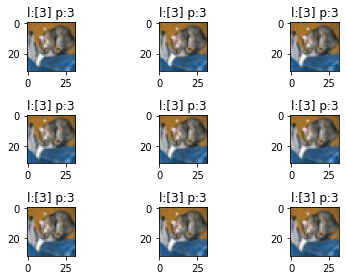

In [31]:
import matplotlib.pyplot as plt

for i in range(9):
  instance_index = false_pred[i] # indeks instancji do narysowania
  plt.subplot(3, 3, i + 1)
  plt.tight_layout()
  plt.imshow(X_test[instance_index].reshape(X_train.shape[1], X_train.shape[2],X_train.shape[3] ), cmap='gray')
  plt.title("l:{} p:{}".format(y_test[instance_index], y_pred[instance_index]))



## Instructions
Powtórz eksperyment z pierwszego notatnika (w którym klasyfikowaliśmy MNIST używając SVM i CNN) na zbiorze danych CIFAR-10: https://keras.io/datasets/

Najpierw przeprowadź klasyfikację za pomocą sieci, które stworzyliśmy na zajęciach - trzeba je dostosować, bo zdjęcia w CIFAR są w RGB, czyli mają 3 kanały.

Następnie wydziel zbiór walidacyjny i dodaj early stopping (https://keras.io/api/callbacks/early_stopping/)

Kolejnym krokiem jest próba poprawienia wyniku. Spróbuj wprowadzić modyfikacje (np. dodawanie, usuwanie lub modyfikacja warstw Conv2D, Dense, Pooling, dodanie Dropoutu, modyfikacja hiperparametrów, itd.) do sieci, które mogłyby poprawić jej skuteczność. Stwórz co najmniej 3 takie sieci i opisz wprowadzone w nich zmiany.

Dla chętnych: jakby ktoś chciałby się bardziej pobawić sieciami, można spróbować dodać jeszcze data augmentation i zrobić porównanie treningu z augmentation i bez.

Wrzuć plik .ipynb ze swoimi eksperymentami i opisami stworzonych sieci.

W razie pytań lub wąpliwości, proszę pisać: lukasz.wilczynski@pjwstk.edu.pl
My work

## Dodawanie Early stopping
Dodajemy early stopping dla tej samej sieci co poprzednio

In [32]:
from keras.callbacks import EarlyStopping
model_basic_es = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_basic_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    mode="auto",
)

In [33]:
history_basic = model_basic_es.fit(X_train, Y_train, epochs=100, batch_size=256,validation_split=0.2, callbacks = [es])

Epoch 1/100
157/157 [==============================] - 11s 67ms/step - loss: 1.7518 - accuracy: 0.3667 - val_loss: 1.5024 - val_accuracy: 0.4732
Epoch 2/100
157/157 [==============================] - 11s 69ms/step - loss: 1.3850 - accuracy: 0.5098 - val_loss: 1.3570 - val_accuracy: 0.5167
Epoch 3/100
157/157 [==============================] - 11s 72ms/step - loss: 1.2666 - accuracy: 0.5533 - val_loss: 1.2551 - val_accuracy: 0.5588
Epoch 4/100
157/157 [==============================] - 12s 74ms/step - loss: 1.1810 - accuracy: 0.5860 - val_loss: 1.1997 - val_accuracy: 0.5851
Epoch 5/100
157/157 [==============================] - 11s 69ms/step - loss: 1.1239 - accuracy: 0.6068 - val_loss: 1.1397 - val_accuracy: 0.6038
Epoch 6/100
157/157 [==============================] - 11s 69ms/step - loss: 1.0604 - accuracy: 0.6311 - val_loss: 1.1192 - val_accuracy: 0.6112
Epoch 7/100
157/157 [==============================] - 11s 68ms/step - loss: 1.0251 - accuracy: 0.6425 - val_loss: 1.0732 - val_ac

## Sieć nr. 1 - głębsza


Teraz sprwadzę na kilku sieciach zmianiając pojedyncze cechy. Dla pierwszej dodam więcej warstw konwolucyjnych 

In [34]:
model_1 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3), padding="same", activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(32, kernel_size=(3,3),  padding="same",activation='relu'),
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                      

In [35]:
history_1 = model_1.fit(X_train, Y_train, epochs=200, batch_size=256,validation_split=0.2, callbacks = [es])

Epoch 1/200
157/157 [==============================] - 39s 244ms/step - loss: 1.7741 - accuracy: 0.3496 - val_loss: 1.4824 - val_accuracy: 0.4615
Epoch 2/200
157/157 [==============================] - 38s 240ms/step - loss: 1.3993 - accuracy: 0.4944 - val_loss: 1.3301 - val_accuracy: 0.5176
Epoch 3/200
157/157 [==============================] - 37s 238ms/step - loss: 1.2129 - accuracy: 0.5651 - val_loss: 1.1727 - val_accuracy: 0.5810
Epoch 4/200
157/157 [==============================] - 37s 235ms/step - loss: 1.0864 - accuracy: 0.6119 - val_loss: 1.1070 - val_accuracy: 0.6110
Epoch 5/200
157/157 [==============================] - 40s 252ms/step - loss: 0.9733 - accuracy: 0.6568 - val_loss: 1.0489 - val_accuracy: 0.6325
Epoch 6/200
157/157 [==============================] - 40s 256ms/step - loss: 0.8896 - accuracy: 0.6873 - val_loss: 1.0071 - val_accuracy: 0.6462
Epoch 7/200
157/157 [==============================] - 39s 247ms/step - loss: 0.8051 - accuracy: 0.7172 - val_loss: 1.0163 -

## Sieć nr. 2 - więcej feature map na jedną warstwę

Druga warstwa ma podwojoną ilość feature map w każdej warstwie

In [36]:
model_2 = Sequential([
  Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(128, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(512, activation='relu'),
  Dense(10, activation='softmax')
])
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history_2 = model_2.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks = [es])

Epoch 1/100
157/157 [==============================] - 48s 303ms/step - loss: 1.5487 - accuracy: 0.4396 - val_loss: 1.3603 - val_accuracy: 0.5221
Epoch 2/100
157/157 [==============================] - 47s 297ms/step - loss: 1.1811 - accuracy: 0.5857 - val_loss: 1.0963 - val_accuracy: 0.6216
Epoch 3/100
157/157 [==============================] - 45s 288ms/step - loss: 1.0000 - accuracy: 0.6524 - val_loss: 1.0610 - val_accuracy: 0.6264
Epoch 4/100
157/157 [==============================] - 45s 285ms/step - loss: 0.9013 - accuracy: 0.6892 - val_loss: 0.9454 - val_accuracy: 0.6769
Epoch 5/100
157/157 [==============================] - 44s 281ms/step - loss: 0.8099 - accuracy: 0.7233 - val_loss: 0.9106 - val_accuracy: 0.6896
Epoch 6/100
157/157 [==============================] - 44s 282ms/step - loss: 0.7314 - accuracy: 0.7479 - val_loss: 0.8763 - val_accuracy: 0.7039
Epoch 7/100
157/157 [==============================] - 44s 283ms/step - loss: 0.6594 - accuracy: 0.7717 - val_loss: 0.8605 -

## Sieć nr. 3 - z dropoutem

Trzecia sieć dodaje warstwę dropout dla zmniejszenia overfittingu

In [38]:
from keras.layers import Dropout
model_3 = Sequential([
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Dropout(.2),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
history_3 = model_3.fit(X_train, Y_train, epochs=100, batch_size=256,validation_split=0.2, callbacks = [es])

Epoch 1/100
157/157 [==============================] - 13s 81ms/step - loss: 1.8138 - accuracy: 0.3454 - val_loss: 1.5880 - val_accuracy: 0.4402
Epoch 2/100
157/157 [==============================] - 12s 79ms/step - loss: 1.4738 - accuracy: 0.4712 - val_loss: 1.3935 - val_accuracy: 0.5083
Epoch 3/100
157/157 [==============================] - 12s 79ms/step - loss: 1.3427 - accuracy: 0.5230 - val_loss: 1.3254 - val_accuracy: 0.5353
Epoch 4/100
157/157 [==============================] - 12s 79ms/step - loss: 1.2512 - accuracy: 0.5566 - val_loss: 1.2434 - val_accuracy: 0.5578
Epoch 5/100
157/157 [==============================] - 12s 79ms/step - loss: 1.1775 - accuracy: 0.5838 - val_loss: 1.1690 - val_accuracy: 0.5934
Epoch 6/100
157/157 [==============================] - 12s 80ms/step - loss: 1.1202 - accuracy: 0.6082 - val_loss: 1.1117 - val_accuracy: 0.6112
Epoch 7/100
157/157 [==============================] - 12s 79ms/step - loss: 1.0663 - accuracy: 0.6269 - val_loss: 1.0759 - val_ac

## Sieć nr. 4 - Data Augmentation

W tej sieci dodajemy 2 warstwy dla Data Augmentation - niestety nie działają one najlepiej dla tak małych obrazków, i nasze wyniki są dużo gorsze

In [40]:
from keras.layers import RandomFlip, RandomRotation
model_4 = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
  Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
history_4 = model_4.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks = [es])

Epoch 1/100
157/157 [==============================] - 13s 78ms/step - loss: 1.9415 - accuracy: 0.2945 - val_loss: 1.7816 - val_accuracy: 0.3514
Epoch 2/100
157/157 [==============================] - 12s 76ms/step - loss: 1.7464 - accuracy: 0.3695 - val_loss: 1.6759 - val_accuracy: 0.3993
Epoch 3/100
157/157 [==============================] - 12s 77ms/step - loss: 1.6744 - accuracy: 0.3938 - val_loss: 1.6430 - val_accuracy: 0.4123
Epoch 4/100
157/157 [==============================] - 12s 77ms/step - loss: 1.6325 - accuracy: 0.4134 - val_loss: 1.5609 - val_accuracy: 0.4453
Epoch 5/100
157/157 [==============================] - 12s 78ms/step - loss: 1.5789 - accuracy: 0.4324 - val_loss: 1.5501 - val_accuracy: 0.4426
Epoch 6/100
157/157 [==============================] - 12s 77ms/step - loss: 1.5397 - accuracy: 0.4473 - val_loss: 1.5829 - val_accuracy: 0.4430
Epoch 7/100
157/157 [==============================] - 12s 75ms/step - loss: 1.5149 - accuracy: 0.4550 - val_loss: 1.5161 - val_ac

## Sieć nr.5 - połączone podejścia 1-3

Tutaj spróbowałem zrobić najbardziej skomplikowaną sieć - głębszą, z większą ilością feature map i z warstwami dropoutowymi

In [42]:
model_5 = Sequential([
  Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", input_shape=input_shape),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(64, kernel_size=(3,3), padding="same", activation='relu'),
  Dropout(0.1),
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Dropout(0.1),
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  MaxPooling2D(pool_size=(2,2)), 
  Conv2D(64, kernel_size=(3,3),  padding="same",activation='relu'),
  Flatten(), # tutaj 2-wymiarowe, wielo kanalowe 'obrazki' staja sie wektorem
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model_5.summary()

In [43]:
history_5 = model_5.fit(X_train, Y_train, epochs=100, batch_size=256, validation_split=0.2, callbacks = [es])

Epoch 1/100
157/157 [==============================] - 70s 445ms/step - loss: 1.8434 - accuracy: 0.3159 - val_loss: 1.5564 - val_accuracy: 0.4252
Epoch 2/100
157/157 [==============================] - 72s 460ms/step - loss: 1.4316 - accuracy: 0.4745 - val_loss: 1.3314 - val_accuracy: 0.5129
Epoch 3/100
157/157 [==============================] - 72s 458ms/step - loss: 1.2349 - accuracy: 0.5559 - val_loss: 1.2962 - val_accuracy: 0.5422
Epoch 4/100
157/157 [==============================] - 71s 455ms/step - loss: 1.0958 - accuracy: 0.6088 - val_loss: 1.0713 - val_accuracy: 0.6208
Epoch 5/100
157/157 [==============================] - 71s 455ms/step - loss: 0.9719 - accuracy: 0.6536 - val_loss: 0.9910 - val_accuracy: 0.6503
Epoch 6/100
157/157 [==============================] - 74s 472ms/step - loss: 0.8817 - accuracy: 0.6889 - val_loss: 0.9620 - val_accuracy: 0.6623
Epoch 7/100
157/157 [==============================] - 73s 466ms/step - loss: 0.8063 - accuracy: 0.7149 - val_loss: 0.8868 -

In [44]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

## Porównanie wyników

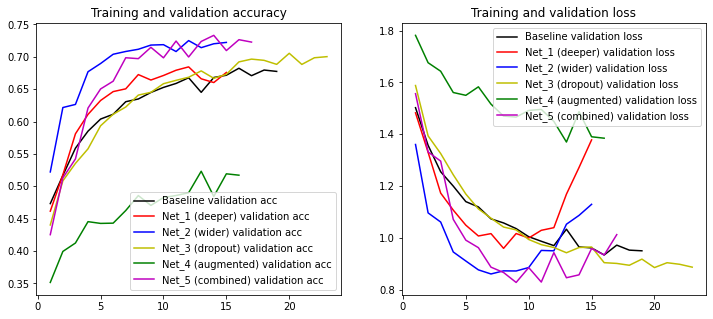

In [59]:
x = range(1, 50)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# plt.plot(x, history.history['_accuracy'], 'b', label='Training acc')
plt.plot(x[:min(len(x),len(history_basic.history['val_accuracy']))], history_basic.history['val_accuracy'], 'k', label='Baseline validation acc')
plt.plot(x[:min(len(x),len(history_1.history['val_accuracy']))], history_1.history['val_accuracy'], 'r', label='Net_1 (deeper) validation acc')
plt.plot(x[:min(len(x),len(history_2.history['val_accuracy']))], history_2.history['val_accuracy'], 'b', label='Net_2 (wider) validation acc')
plt.plot(x[:min(len(x),len(history_3.history['val_accuracy']))], history_3.history['val_accuracy'], 'y', label='Net_3 (dropout) validation acc')
plt.plot(x[:min(len(x),len(history_4.history['val_accuracy']))], history_4.history['val_accuracy'], 'g', label='Net_4 (augmented) validation acc')
plt.plot(x[:min(len(x),len(history_5.history['val_accuracy']))], history_5.history['val_accuracy'], 'm', label='Net_5 (combined) validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
# plt.plot(x, history.history['loss'], 'b', label='Training loss')
plt.plot(x[:min(len(x),len(history_basic.history['val_loss']))], history_basic.history['val_loss'], 'k', label='Baseline validation loss')
plt.plot(x[:min(len(x),len(history_1.history['val_loss']))], history_1.history['val_loss'], 'r', label='Net_1 (deeper) validation loss')
plt.plot(x[:min(len(x),len(history_2.history['val_loss']))], history_2.history['val_loss'], 'b', label='Net_2 (wider) validation loss')
plt.plot(x[:min(len(x),len(history_3.history['val_loss']))], history_3.history['val_loss'], 'y', label='Net_3 (dropout) validation loss')
plt.plot(x[:min(len(x),len(history_4.history['val_loss']))], history_4.history['val_loss'], 'g', label='Net_4 (augmented) validation loss')
plt.plot(x[:min(len(x),len(history_5.history['val_loss']))], history_5.history['val_loss'], 'm', label='Net_5 (combined) validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Widać że najlepsze wyniki osiągamy dla sieci połączonej, i bardzo podobne dla sieci z większą ilością feature map. Pogłębienie sieci nie wpływa znacząco na wynik, za to dodanie dropouty pozwala na wyciśnięcie kilka ekstra punktów procentowych z naszej sieci